
# ANSWER TO THE QUSTION NO. 7

In [55]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [56]:
t = np.arange(0, 15, 0.01)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.497e+01, 1.498e+01,
       1.499e+01])

In [57]:
len(t)

1500

In [58]:
# Declare Final time T
T= 15
Tsq = np.power(T,2)
Tcb = np.power(T,3)

In [59]:
#initialized A
A = np.array([[1, 0, 0, 0,  0, 0, 0, 0],
              [0, 1, 0, 0,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, 0, 0, 0],
              [0, 0, 0, 0,  0, 1, 0, 0],
              [1, T, Tsq, Tcb,  0, 0, 0, 0],
              [0, 1, 2*T, 3*Tsq,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, T, Tsq, Tcb,],
              [0, 0, 0, 0,  0, 1, 2*T, 3*Tsq]
              ]
            )
A

array([[   1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0],
       [   1,   15,  225, 3375,    0,    0,    0,    0],
       [   0,    1,   30,  675,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,   15,  225, 3375],
       [   0,    0,    0,    0,    0,    1,   30,  675]])

In [81]:
# A pesudo inverse
Ainv = np.linalg.pinv(A)
#initialized b
b =  np.array([[0],#x1(0)
               [0],#1
               [0],#x3(0)
               [-0.5],#x2(0)
               [5],#x1(T)
               [0],#1
               [5],#x3(T)
               [-0.5] #x2(T)
              ]
            )
#matrix multiplication x = Ainv * b
x= np.matmul(Ainv, b)

In [82]:
a11 = x[0]
a11
a12 = x[1]
a12
a13 = x[2]
a13
a14 = x[3]
a14
a21 = x[4]
a21
a22 = x[5]
a22
a23 = x[6]
a23
a24 = x[7]
a24
for i in t:
  X = a11 + (a12* t) + (a13 * np.power(t,2)) + (a14 * np.power(t,3))
  Y = a21 + (a22* t) + (a23 * np.power(t,2)) + (a24 * np.power(t,3) )

X, Y

(array([-4.32162986e-15,  6.66370370e-06,  2.66429630e-05, ...,
         4.99994008e+00,  4.99997336e+00,  4.99999334e+00]),
 array([-2.04764931e-13, -4.98334074e-03, -9.93339259e-03, ...,
         5.01485020e+00,  5.00993339e+00,  5.00498334e+00]))

Text(0, 0.5, 'Y')

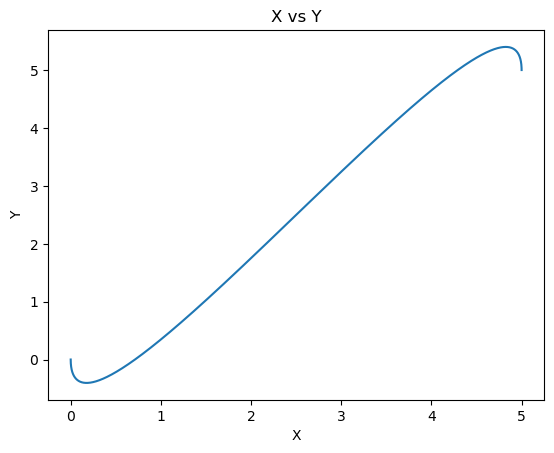

In [83]:
plt.plot(X,Y)
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

In [73]:
X_new = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_new = a21 + a22 * t + a23 * t**2 + a24 * t**3

In [74]:
Xdd = np.gradient(np.gradient(X_new, t), t)
Ydd = np.gradient(np.gradient(Y_new, t), t)

In [75]:
theta = np.arctan2(np.gradient(Y_new, t), np.gradient(X_new, t))
V = np.sqrt(np.gradient(X_new, t)**2 + np.gradient(Y_new, t)**2)
a = np.cos(theta) * Xdd + np.sin(theta) * Ydd

omega = (-np.sin(theta) * Xdd + np.cos(theta) * Ydd) / V

In [76]:
noise_std_v = 0.01
noise_std_theta = 0.001
noise_v = np.random.normal(0, noise_std_v, len(t))
noise_theta = np.random.normal(0, noise_std_theta, len(t))

In [77]:
# initialize
# x_final = X_new[0]
# y_final = Y_new[0]
# theta_final = theta[0]
# V_final = V[0]
x_final = X_new[0]
y_final = Y_new[0]
theta_final = theta[0]
V_final = V[0]

In [78]:
x_states = [x_final]
y_states = [y_final]


In [79]:
# for i in range(1, len(t)):
#     x_final += V_final * np.cos(theta_final) * (t[i] - t[i-1])  
#     y_final += V_final * np.sin(theta_final) * (t[i] - t[i-1]) 
#     theta_final += omega[i] * (t[i] - t[i-1]) 
#     V_final += a[i] * (t[i] - t[i-1])

#     x_states.append(x_final)
#     y_states.append(y_final)
for i in range(1, len(t)):
    x_final += V_final * np.cos(theta_final) * (t[i] - t[i-1])
    y_final += V_final * np.sin(theta_final) * (t[i] - t[i-1])
    
    # Add noise to theta and V
    theta_final += omega[i] * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)
    V_final += a[i] * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)

    x_states.append(x_final)
    y_states.append(y_final)
    
    


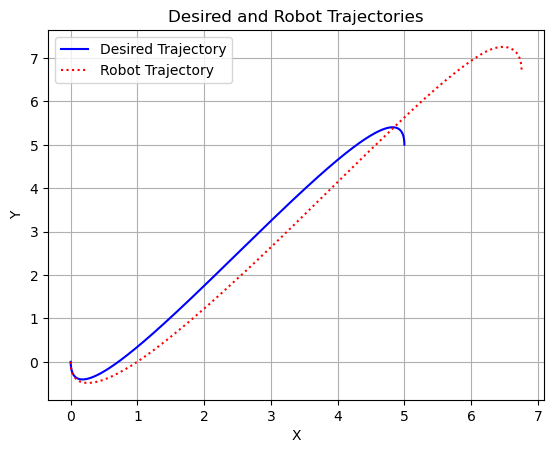

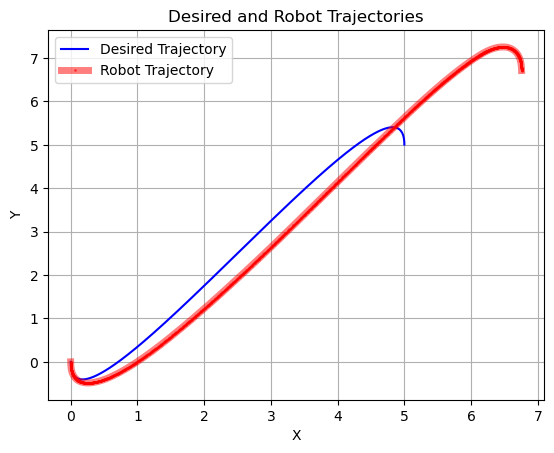

In [80]:
plt.figure()
plt.plot(X, Y, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='dotted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories')
plt.grid(True)
plt.show()
plt.figure()
plt.plot(X, Y, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='-', linewidth=5, color='red', alpha=0.5, marker='o', markersize=1, markeredgecolor='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories')
plt.grid(True)
plt.show()
